# Задание 5. Извлечение данных 

## Задание 5.1

Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или аналогичных библиотек, постройте график числа сообщений в зависимости от даты. 

## Задание 5.2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательна визуализация. 

Парсер тг канал также выложен в репозитории (main.py), здесь использую полученные данные - chats.csv

In [126]:
from google.colab import files
uploaded = files.upload()
#сюда загружаем файлы для анализа (chats.csv)

Saving chats.csv to chats (2).csv


In [6]:
import pandas as pd

In [9]:
data = pd.read_csv('chats.csv', encoding='utf-8', names = ['Message'], header = None, index_col=False, parse_dates=[0])

In [10]:
data.head(9)

,Message
0,Сообщения
1,Ж53
2,История вакцинации:
3,=====8<====
4,V1 15.12.20 спутник
5,V2 05.01.21 спутник
6,01.02.21 - 73 диасоринов (Helix).
7,V3 12.06.21 спутник
8,V4 03.07.21 спутник


In [12]:
import re

In [52]:
list_sex = []
list_age = []
for i in data.iloc:
  ans = re.findall("[ЖМжм]\d{2}",str(i))
  if len(ans) != 0:
    list.extend([ans])
for i in list:
  list_sex.append(i[0][0].upper())
  list_age.append(i[0][1:])


In [53]:
df = pd.DataFrame({'age':list_age,
                  'sex':list_sex})
df.to_csv('file2.csv', index=False, header=False)


In [54]:
print(df)

       age sex
0       53   Ж
1       33   М
2       35   Ж
3       37   Ж
4       50   Ж
...     ..  ..
101800  43   М
101801  47   Ж
101802  32   Ж
101803  34   Ж
101804  37   М

[101805 rows x 2 columns]


In [83]:
 ag = df['age'].value_counts().rename_axis('age').reset_index(name='Amount').sort_values('age')

In [60]:
sx =  df['sex'].value_counts().rename_axis('sex').reset_index(name='Amount')

In [84]:
print(ag)

   age  Amount
80  11      11
65  12     198
62  13     231
60  14     242
69  15     154
..  ..     ...
75  89      33
73  90      77
79  91      22
81  93      11
77  94      22

[82 rows x 2 columns]


In [96]:
x = ag['age'].tolist()
y = ag['Amount'].tolist()

<BarContainer object of 82 artists>

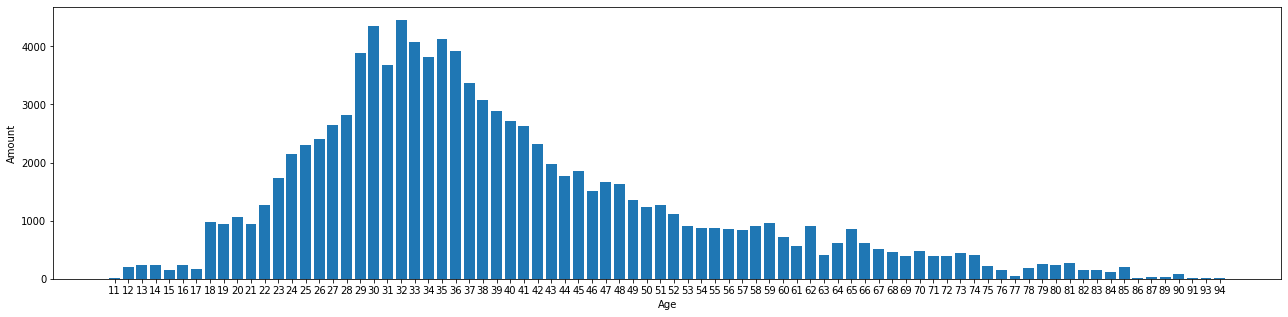

In [98]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(22,5))
plt.ylabel('Amount')
plt.xlabel('Age')
plt.bar(x, y)

In [99]:
print(sx)

  sex  Amount
0   Ж   61369
1   М   40436


In [100]:
labels = sx['sex'].tolist()
amount = sx['Amount'].tolist()

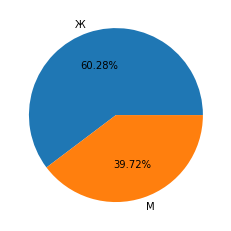

In [101]:
fig1, ax1 = plt.subplots()
ax1.pie(amount, labels=labels,autopct='%1.2f%%')
plt.show()

В качестве анализа я выделила самые распространенные симптомы короновируса и оценила частоту их появления у участников телеграм канала

In [122]:
temp = 0 #температура
cough = 0 #кашель
r_nose = 0 #насморк
edema = 0 #отек
chills= 0 #озноб
vomit = 0 #рвота
hunger = 0 #голод
headache = 0 #головная боль
drowsiness = 0 #слабость
aches = 0 #ломота
fever = 0 #лихорадка
for i in data.iloc:
  ans = re.findall("температура",str(i))
  if len(ans) != 0:
    temp+=1
  ans = re.findall("кашель",str(i))
  if len(ans) != 0:
    cough+=1
  ans = re.findall("насморк",str(i))
  if len(ans) != 0:
    r_nose+=1
  ans = re.findall("отек",str(i))
  if len(ans) != 0:
    edema+=1
  ans = re.findall("зуд",str(i))
  if len(ans) != 0:
    itch+=1
  ans = re.findall("рвота",str(i))
  if len(ans) != 0:
    vomit+=1
  ans = re.findall("озноб",str(i))
  if len(ans) != 0:
    chills+=1
  ans = re.findall("головная боль",str(i))
  if len(ans) != 0:
    headache+=1
  ans = re.findall("слабость",str(i))
  if len(ans) != 0:
    drowsiness+=1
  ans = re.findall("ломота",str(i))
  if len(ans) != 0:
    aches+=1
  ans = re.findall("лихорадка",str(i))
  if len(ans) != 0:
    fever+=1


In [123]:
amount = [temp, cough, r_nose, edema, itch, vomit, hunger, headache, drowsiness, aches, fever]

In [124]:
labels = ['температура','кашель','насморк','отек','зуд','рвота','голод','головная боль','слабость','ломота','лихорадка']

<BarContainer object of 11 artists>

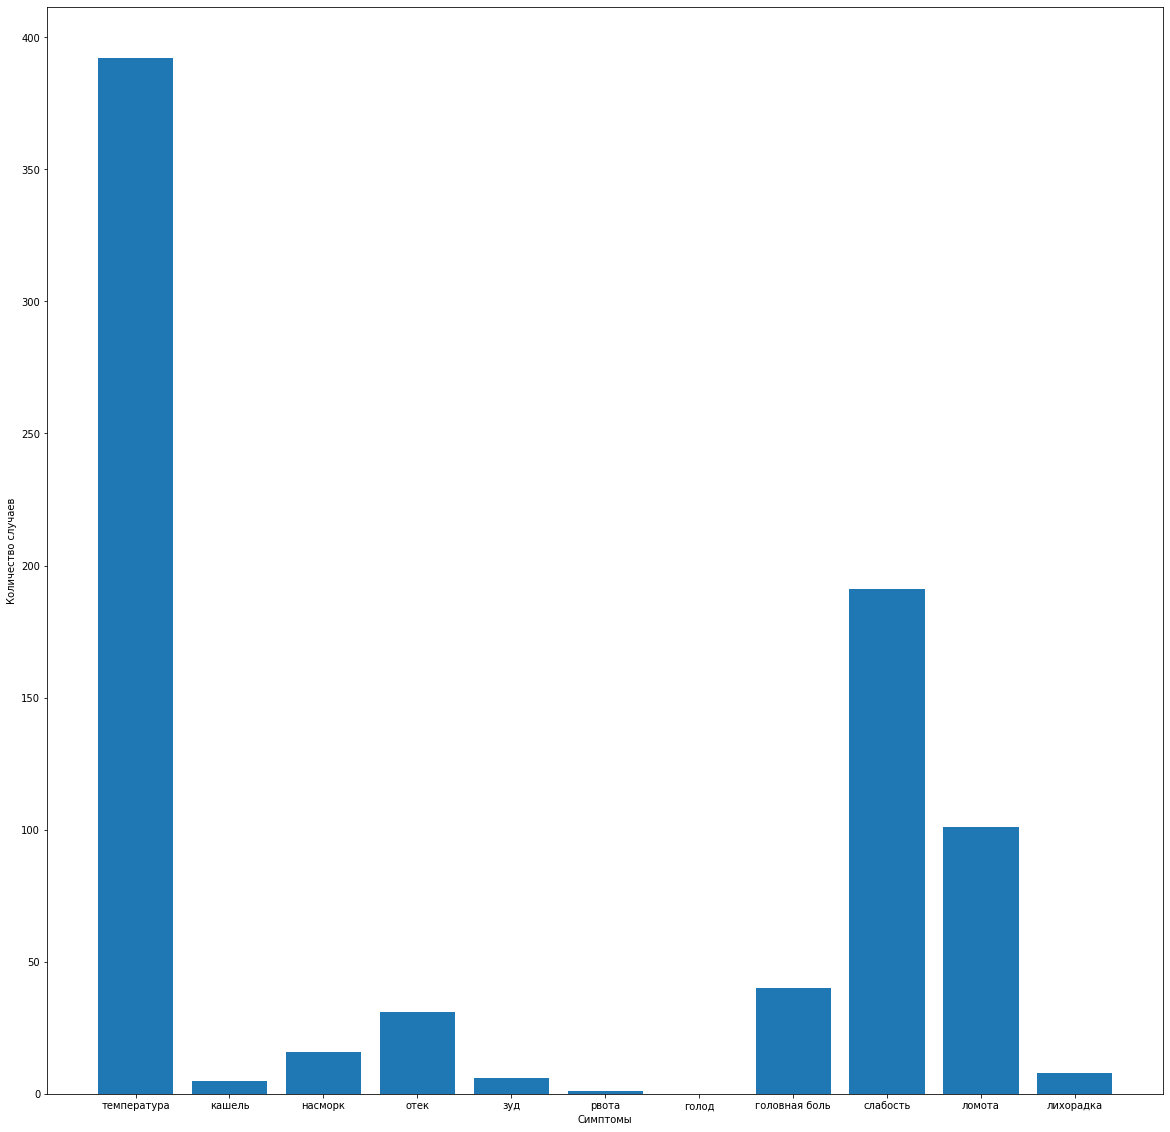

In [125]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(20,20))
plt.ylabel('Количество случаев')
plt.xlabel('Симптомы')
plt.bar(labels, amount)